# MELODIES-MONET dev

This example illustrates MELODIES-MONET capabilities through analyzing the performance of FV3-RAQMS model runs relative to AERONET observations.

First, import the driver class.

In [1]:
from melodies_monet import driver

/home/mbruckner/miniconda3/envs/develop_monet/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### Driver Class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both. This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File
set the yaml control fire and begin by reading the file

In [3]:
an.control = 'control_raqms.yaml'
an.read_control()

### Loading the model data

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames. Note it can open multiple files easily by including hot keys

In [4]:
an.open_models()

control
{'files': '/ships19/aqda/mbruckner/monet_plots/linked_control/tracer*nc', 'mod_type': 'fv3raqms', 'radius_of_influence': 19500, 'mapping': {'aeronet': {'aod': 'aod_550nm'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': '^', 'linestyle': '-'}}
fv3raqms
/ships19/aqda/mbruckner/monet_plots/linked_control/tracer*nc
gocart_aod
{'files': '/ships19/models2/lenzen/FV3GFS.9.0.2019/O3.VIIRS.GOCART_AODFRACTION/C192/5DEGLL/tracer*nc', 'mod_type': 'fv3raqms', 'radius_of_influence': 19500, 'mapping': {'aeronet': {'aod': 'aod_550nm'}}, 'projection': 'None', 'plot_kwargs': {'color': 'goldenrod', 'marker': '^', 'linestyle': '-'}}
fv3raqms
/ships19/models2/lenzen/FV3GFS.9.0.2019/O3.VIIRS.GOCART_AODFRACTION/C192/5DEGLL/tracer*nc


In [5]:
an.models['gocart_aod'].obj

<xarray.Dataset>
Dimensions:     (time: 241, tile: 6, x: 720, y: 361, z: 64)
Coordinates:
  * time        (time) datetime64[ns] 2019-07-01T18:00:00 ... 2019-08-30T18:0...
  * x           (x) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... -2.5 -2.0 -1.5 -1.0 -0.5
  * y           (y) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * z           (z) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 60.0 61.0 62.0 63.0 64.0
    longitude   (y, x) float64 0.0 0.5 1.0 1.5 2.0 ... -2.5 -2.0 -1.5 -1.0 -0.5
    latitude    (y, x) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
Dimensions without coordinates: tile
Data variables: (12/158)
    imin        (time, tile) int32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    imax        (time, tile) int32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    jmin        (time, tile) int32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    jmax        (time, tile) int32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    aod         (time, y, x) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    aodgsi      (time, y, x) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
    ...          ...
    jo1d        (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
    jno         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
    cot6hr      (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
    emcofire    (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
    covermx     (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
    oxvermx     (time, z, y, x) float32 dask.array<chunksize=(1, 64, 361, 720), meta=np.ndarray>
Attributes:
    CDATE:        2019070118
    from:         fv32ll.gen.gen.deflate.f90
    case:         C192
    ak:           [0.0000000e+00 0.0000000e+00 5.7500000e-01 5.7410000e+00 2....
    bk:           [1.0000000e+00 9.9467119e-01 9.8862660e-01 9.8174229e-01 9....
    forecast_hr:  6.0
    timestep:     450.0

### Open Obs

Now for melodies-monet we will open preprocessed data in either netcdf icartt or some other format. We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....). Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label

In [6]:
an.open_obs()

### Pair data, generate plots, calculate stats

In [7]:
an.pair_data()

[########################################] | 100% Completed |  7.6s
[########################################] | 100% Completed |  7.7s
[########################################] | 100% Completed |  7.8s
[########################################] | 100% Completed |  7.8s
[########################################] | 100% Completed | 22.5s
[########################################] | 100% Completed | 22.6s
[########################################] | 100% Completed | 22.7s
[########################################] | 100% Completed | 22.7s


[########################################] | 100% Completed |  7.5s
[########################################] | 100% Completed |  7.5s
[########################################] | 100% Completed |  7.6s
[########################################] | 100% Completed |  7.7s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.5s
[########################################] | 100

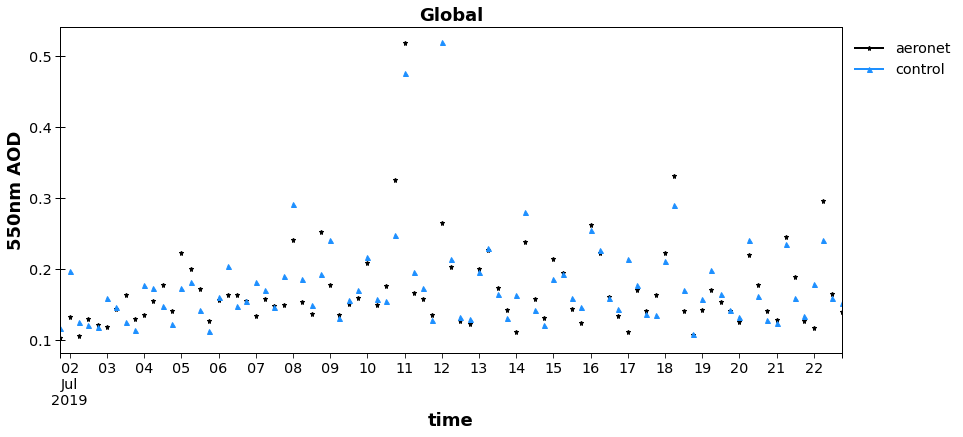

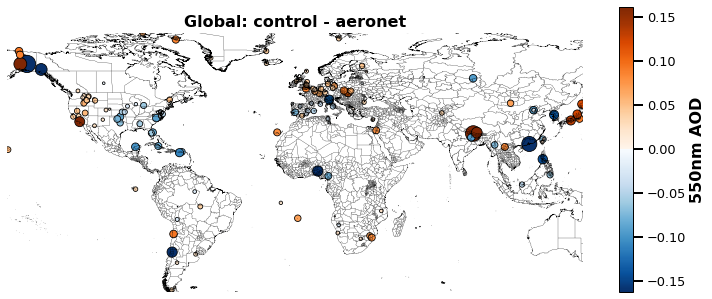

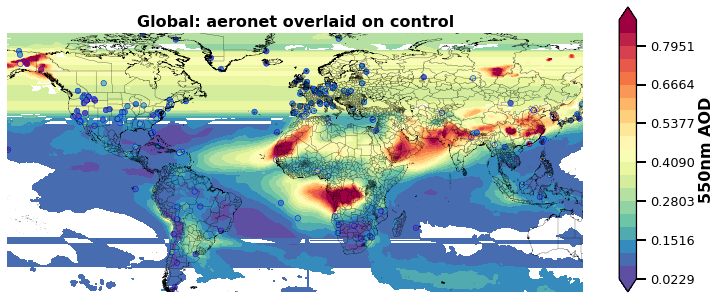

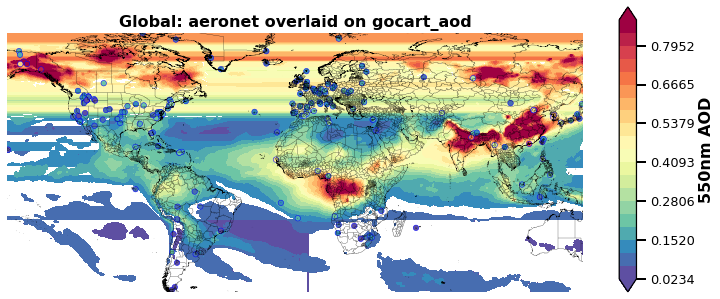

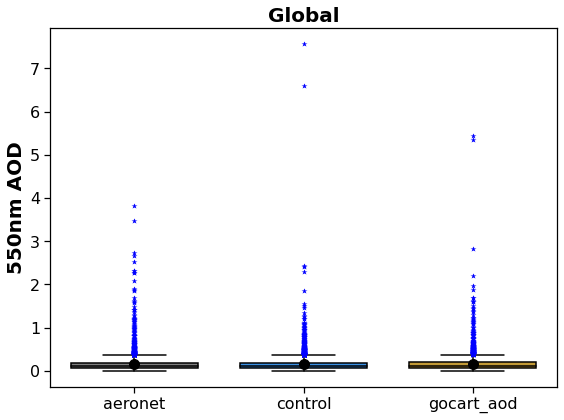

In [8]:
an.plotting()

In [9]:
an.stats()

### Additional plots: scatter plot

In [10]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

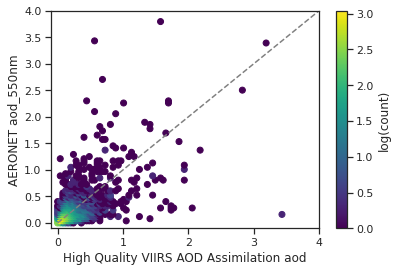

In [11]:
binb = np.linspace(0,4,100)
ct, xedge,ydedge,n=stats.binned_statistic_2d(an.paired['aeronet_gocart_aod'].obj['aod'].values.flatten(),an.paired['aeronet_gocart_aod'].obj['aod_550nm'].values.flatten(),None,'count',bins = binb)
x,y = np.meshgrid(xedge[:-1],ydedge[:-1])
ct[ct ==0] = np.nan
c = plt.scatter(x,y,c=np.log10(ct.T),cmap='viridis')#,alpha=0.2,vmin=0)#,vmax=vmaxs)

plt.xlabel('High Quality VIIRS AOD Assimilation aod')
plt.ylabel('AERONET aod_550nm')
plt.colorbar(c,label='log(count)')
plt.plot(xedge,ydedge,c='grey',linestyle='dashed')
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.show()

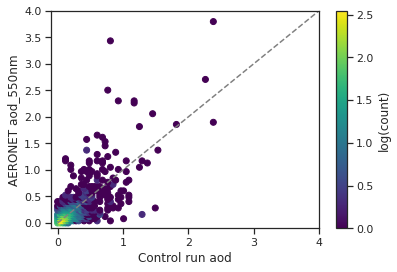

In [12]:
binb = np.linspace(0,4,100)
ct, xedge,ydedge,n=stats.binned_statistic_2d(an.paired['aeronet_control'].obj['aod'].values.flatten(),an.paired['aeronet_control'].obj['aod_550nm'].values.flatten(),None,'count',bins = binb)
x,y = np.meshgrid(xedge[:-1],ydedge[:-1])
ct[ct ==0] = np.nan    
c = plt.scatter(x,y,c=np.log10(ct.T),cmap='viridis')#,alpha=0.2,vmin=0)#,vmax=vmaxs)

plt.xlabel('Control run aod')
plt.ylabel('AERONET aod_550nm')
plt.colorbar(c,label='log(count)')
plt.plot(xedge,ydedge,c='grey',linestyle='dashed')
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.show()